Họ và tên: Nguyễn Vũ Dương

MSSV: 20520465

#Import thư viện

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
from keras.models import load_model, Model
from tensorflow import keras
from random import randint
import matplotlib.pyplot as plt
import numpy as np

#Load data

In [46]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  y_train = tf.keras.utils.to_categorical(y_train,np.max(y_train)+1)
  y_test = tf.keras.utils.to_categorical(y_test,np.max(y_test)+1)
  return x_train, y_train, x_test, y_test

In [47]:
x_train, y_train, x_test, y_test = load_dataset()

#Định nghĩa model LeNet và các biến thể

In [41]:
def LeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = Conv2D(6, (3, 3), padding='same', activation='sigmoid')(input)
  x = AveragePooling2D(pool_size=(2, 2), padding="same")(x)
  x = Conv2D(16, (3, 3), padding='same', activation='sigmoid')(x)
  x = AveragePooling2D(pool_size=(2, 2), padding="same")(x)
  x = Flatten()(x)
  x = Dense(120, activation='sigmoid', use_bias=True)(x)
  x = Dense(84, activation='sigmoid', use_bias=True)(x)
  output = Dense(classes, activation='softmax', use_bias=True)(x)
  return Model(input, output)

#Biến thể Alpha - Thay activation `sigmoid` bằng `relu`
def AlphaLeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
  x = AveragePooling2D(pool_size=(2, 2), padding="same")(x)
  x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
  x = AveragePooling2D(pool_size=(2, 2), padding="same")(x)
  x = Flatten()(x)
  x = Dense(120, activation='relu', use_bias=True)(x)
  x = Dense(84, activation='relu', use_bias=True)(x)
  output = Dense(classes, activation='softmax', use_bias=True)(x)
  return Model(input, output)

#Biến thể Beta - Thay AveragePooling bằng MaxPooling của Alpha
def BetaLeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
  x = MaxPooling2D(pool_size=(2, 2), padding="same")(x)
  x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
  x = MaxPooling2D(pool_size=(2, 2), padding="same")(x)
  x = Flatten()(x)
  x = Dense(120, activation='relu', use_bias=True)(x)
  x = Dense(84, activation='relu', use_bias=True)(x)
  output = Dense(classes, activation='softmax', use_bias=True)(x)
  return Model(input, output)

#Biến thể Gamma - Bỏ hết hàm activation trong biến thể Beta
def GammaLeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = Conv2D(6, (3, 3), padding='same', activation=None)(input)
  x = MaxPooling2D(pool_size=(2, 2), padding="same")(x)
  x = Conv2D(16, (3, 3), padding='same', activation=None)(x)
  x = MaxPooling2D(pool_size=(2, 2), padding="same")(x)
  x = Flatten()(x)
  x = Dense(120, activation=None, use_bias=True)(x)
  x = Dense(84, activation=None, use_bias=True)(x)
  output = Dense(classes, activation=None, use_bias=True)(x)
  return Model(input, output)

#Biến thể Omicron - Bỏ hết hàm Pooling trong biến thể Beta
def OmicronLeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
  x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
  x = Flatten()(x)
  x = Dense(120, activation='relu', use_bias=True)(x)
  x = Dense(84, activation='relu', use_bias=True)(x)
  output = Dense(classes, activation='softmax', use_bias=True)(x)
  return Model(input, output)

#Biến thể Delta - Bỏ hết lớp Convolution trong biến thể Beta
def DeltaLeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = MaxPooling2D(pool_size=(2, 2), padding="same")(x)
  x = MaxPooling2D(pool_size=(2, 2), padding="same")(x)
  x = Flatten()(x)
  x = Dense(120, activation='relu', use_bias=True)(x)
  x = Dense(84, activation='relu', use_bias=True)(x)
  output = Dense(classes, activation='softmax', use_bias=True)(x)
  return Model(input, output)

#Biến thể hyper - Chọn các hyperparameter là 1 trừ lớp output
def HyperLeNetCNN(input_shape,classes):
  input = Input(shape = input_shape)
  x =tf.keras.layers.Rescaling(1./255)(input)
  x = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(input)
  x = AveragePooling2D(pool_size=(2, 2), padding="same")(x)
  x = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)
  x = AveragePooling2D(pool_size=(2, 2), padding="same")(x)
  x = Flatten()(x)
  x = Dense(1, activation='sigmoid', use_bias=True)(x)
  x = Dense(1, activation='sigmoid', use_bias=True)(x)
  output = Dense(classes, activation='softmax', use_bias=True)(x)
  return Model(input, output)

def train_model(model,x_train, y_train,x_val, y_val,name = 'model_cnn',epoch = 50):
  callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.75, patience=3, min_delta=0.001,
                          mode='max', min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_accuracy',patience=6,verbose=1,mode='max')
  ]
  model.compile(optimizer=tf.keras.optimizers.experimental.Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = epoch, batch_size = 128,callbacks = callbacks)
  model.save("{}.h5".format(name))
  return history 



In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
def accu(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

#Model LeNet

In [48]:
LeNet = LeNetCNN((28,28,1),len(y_train[0]))
LeNet.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 16)        880       
                                                                 
 average_pooling2d_11 (Avera  (None, 7, 7, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_9 (Flatten)         (None, 784)               0   

In [49]:
history_LeNet = train_model(LeNet,x_train, y_train, x_test, y_test,name = 'LeeNet',epoch = 50)

Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 1.3064 - accuracy: 0.5872 - val_loss: 0.4379 - val_accuracy: 0.8786 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3490 - accuracy: 0.8979 - val_loss: 0.2768 - val_accuracy: 0.9169 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2432 - accuracy: 0.9269 - val_loss: 0.1980 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1873 - accuracy: 0.9428 - val_loss: 0.1602 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1480 - accuracy: 0.9551 - val_loss: 0.1246 - val_accuracy: 0.9624 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1233 - accuracy: 0.9626 - val_loss: 0.1019 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - lo

1/1 [==============================] - 0s 114ms/step


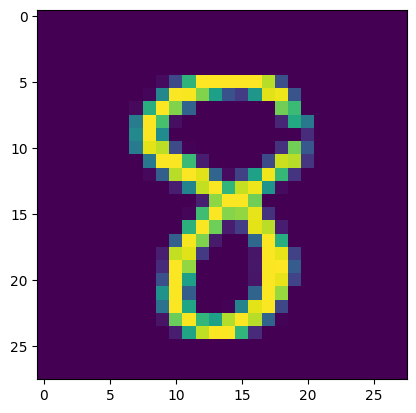

Predicted label:  8
Ground-truth label:  8


In [50]:
i = randint(0,len(x_test))
test = x_test[i]
pred = LeNet.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 1s 2ms/step


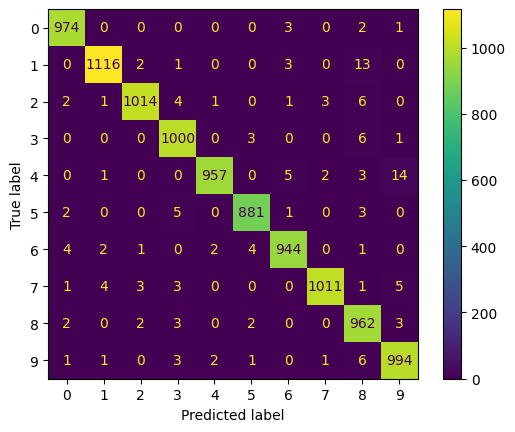

(0.9853, 0.9852899277001104)

In [51]:
y_pred_Lenet =LeNet.predict(x_test)
y_pred_Lenet = np.array([np.argmax(i) for i in y_pred_Lenet])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Lenet)

#Model Alpha - Thay activation `sigmoid` bằng `relu`

In [52]:
Alpha = AlphaLeNetCNN((28,28,1),len(y_train[0]))
Alpha.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        880       
                                                                 
 average_pooling2d_13 (Avera  (None, 7, 7, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_10 (Flatten)        (None, 784)               0  

In [53]:
history_Alpha = train_model(Alpha,x_train, y_train, x_test, y_test,name = 'Alpha',epoch = 50)

Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 0.2903 - accuracy: 0.9296 - val_loss: 0.0787 - val_accuracy: 0.9761 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0533 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0476 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0603 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0452 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0599 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - lo

1/1 [==============================] - 0s 77ms/step


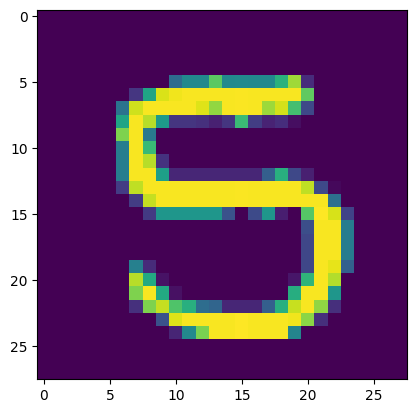

Predicted label:  5
Ground-truth label:  5


In [54]:
i = randint(0,len(x_test))
test = x_test[i]
pred = Alpha.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 1s 2ms/step


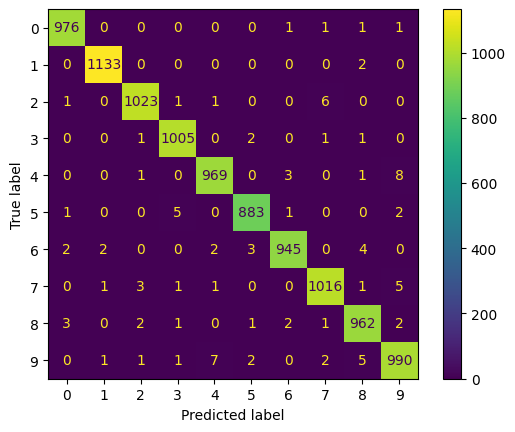

(0.9902, 0.9900984605579186)

In [55]:
y_pred_Alpha =Alpha.predict(x_test)
y_pred_Alpha = np.array([np.argmax(i) for i in y_pred_Alpha])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Alpha)

#Model Beta - Thay AveragePooling bằng MaxPooling của Alpha

In [56]:
Beta = BetaLeNetCNN((28,28,1),len(y_train[0]))
Beta.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 784)               0  

In [57]:
history_Beta = train_model(Beta,x_train, y_train, x_test, y_test,name = 'Beta',epoch = 50)

Epoch 1/50
469/469 [==============================] - 5s 5ms/step - loss: 0.7348 - accuracy: 0.8815 - val_loss: 0.1648 - val_accuracy: 0.9526 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1305 - accuracy: 0.9603 - val_loss: 0.1162 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0856 - accuracy: 0.9728 - val_loss: 0.0879 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9798 - val_loss: 0.0732 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9838 - val_loss: 0.0658 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.0615 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - lo

1/1 [==============================] - 0s 126ms/step


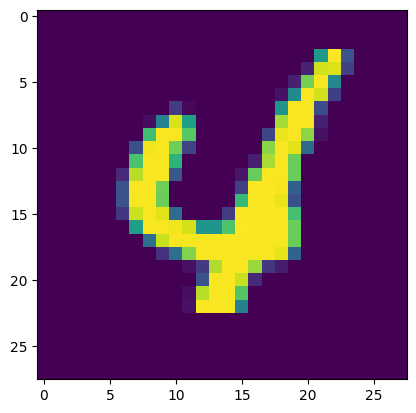

Predicted label:  4
Ground-truth label:  4


In [58]:
i = randint(0,len(x_test))
test = x_test[i]
pred = Beta.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 1s 2ms/step


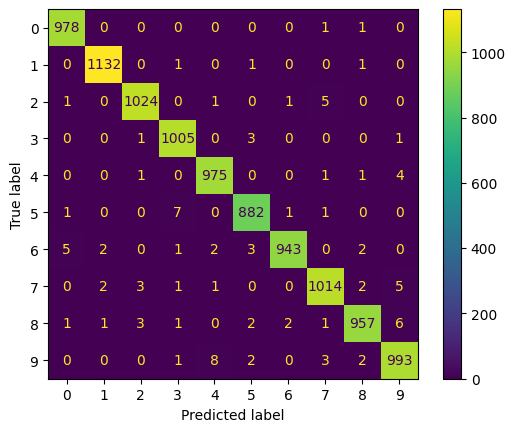

(0.9903, 0.9901948085158944)

In [59]:
y_pred_Beta =Beta.predict(x_test)
y_pred_Beta = np.array([np.argmax(i) for i in y_pred_Beta])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Beta)

#Model Gamma - Bỏ hết hàm activation trong biến thể Beta

In [60]:
Gamma = GammaLeNetCNN((28,28,1),len(y_train[0]))
Gamma.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 784)               0  

In [61]:
history_Gamma = train_model(Gamma,x_train, y_train, x_test, y_test,name = 'Gamma',epoch = 50)

Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 10.6571 - accuracy: 0.2025 - val_loss: 10.8733 - val_accuracy: 0.2052 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 10.7672 - accuracy: 0.2051 - val_loss: 10.8733 - val_accuracy: 0.2052 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 10.7672 - accuracy: 0.2051 - val_loss: 10.8733 - val_accuracy: 0.2052 - lr: 0.0010
Epoch 4/50
464/469 [============================>.] - ETA: 0s - loss: 10.7702 - accuracy: 0.2051
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
469/469 [==============================] - 3s 6ms/step - loss: 10.7672 - accuracy: 0.2051 - val_loss: 10.8733 - val_accuracy: 0.2052 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 10.7672 - accuracy: 0.2051 - val_loss: 10.8733 - val_accuracy: 0.2052 - lr: 7.5000e-04
Epoch 6/50
469/469 [=============================

1/1 [==============================] - 0s 95ms/step


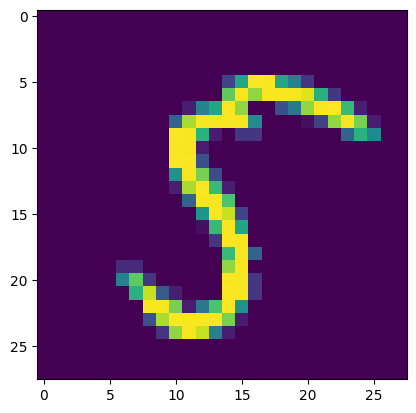

Predicted label:  8
Ground-truth label:  5


In [62]:
i = randint(0,len(x_test))
test = x_test[i]
pred = Gamma.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 1s 2ms/step


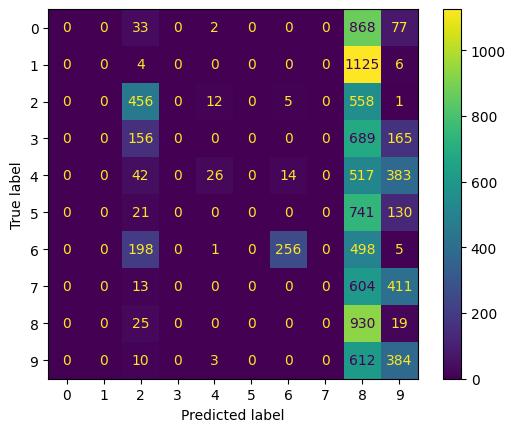

(0.2052, 0.14499231136230475)

In [63]:
y_pred_Gamma =Gamma.predict(x_test)
y_pred_Gamma = np.array([np.argmax(i) for i in y_pred_Gamma])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Gamma)

#Model Omicron - Bỏ hết hàm Pooling trong biến thể Beta

In [64]:
Omicron = OmicronLeNetCNN((28,28,1),len(y_train[0]))
Omicron.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 16)        880       
                                                                 
 flatten_13 (Flatten)        (None, 12544)             0         
                                                                 
 dense_39 (Dense)            (None, 120)               1505400   
                                                                 
 dense_40 (Dense)            (None, 84)                10164     
                                                                 
 dense_41 (Dense)            (None, 10)                850

In [65]:
history_Omicron = train_model(Omicron,x_train, y_train, x_test, y_test,name = 'Omicron',epoch = 50)

Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 0.8039 - accuracy: 0.9151 - val_loss: 0.1025 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0636 - accuracy: 0.9805 - val_loss: 0.0896 - val_accuracy: 0.9724 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0758 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0750 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0667 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 6/50
464/469 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9949
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
469/469 [==============================] - 2s 5ms/ste

1/1 [==============================] - 0s 65ms/step


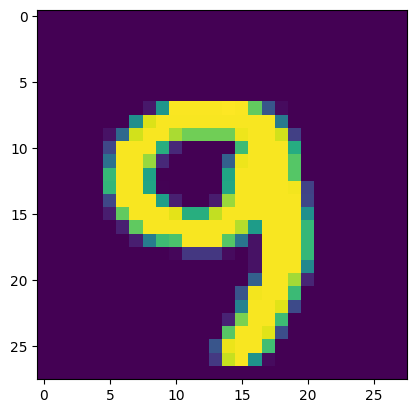

Predicted label:  9
Ground-truth label:  9


In [66]:
i = randint(0,len(x_test))
test = x_test[i]
pred = Omicron.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 1s 2ms/step


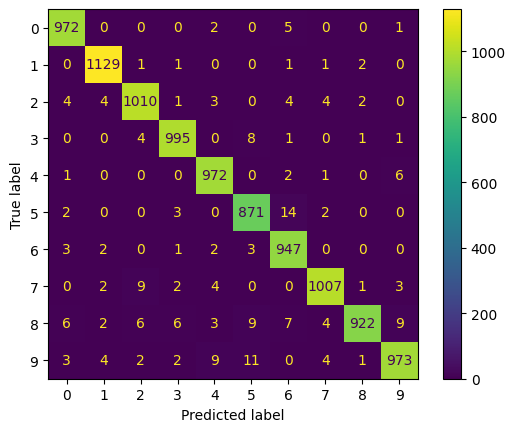

(0.9798, 0.9794963977309962)

In [67]:
y_pred_Omicron =Omicron.predict(x_test)
y_pred_Omicron = np.array([np.argmax(i) for i in y_pred_Omicron])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Omicron)

#Model Delta - Bỏ hết lớp Convolution trong biến thể Beta

In [68]:
Delta = DeltaLeNetCNN((28,28,1),len(y_train[0]))
Delta.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_14 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 1)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 1)          0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 49)                0         
                                                                 
 dense_42 (Dense)            (None, 120)               600

In [69]:
history_Delta = train_model(Delta,x_train, y_train, x_test, y_test,name = 'Delta',epoch = 50)

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.7194 - accuracy: 0.7804 - val_loss: 0.4705 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4395 - accuracy: 0.8558 - val_loss: 0.4146 - val_accuracy: 0.8675 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3903 - accuracy: 0.8709 - val_loss: 0.3820 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3579 - accuracy: 0.8820 - val_loss: 0.3612 - val_accuracy: 0.8803 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3349 - accuracy: 0.8890 - val_loss: 0.3550 - val_accuracy: 0.8817 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3193 - accuracy: 0.8949 - val_loss: 0.3377 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - lo

1/1 [==============================] - 0s 58ms/step


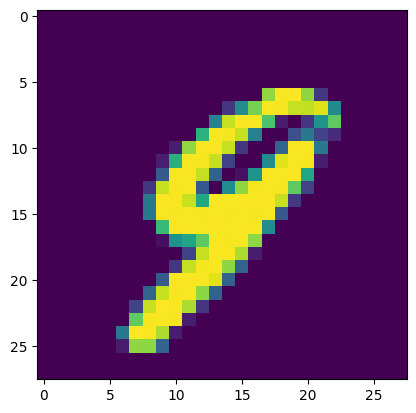

Predicted label:  9
Ground-truth label:  9


In [70]:
i = randint(0,len(x_test))
test = x_test[i]
pred = Delta.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 0s 1ms/step


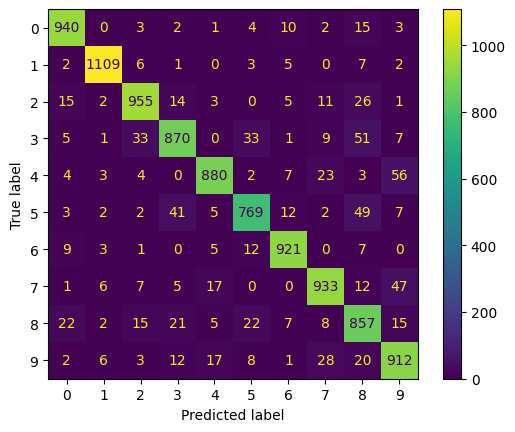

(0.9146, 0.9136086205904347)

In [71]:
y_pred_Delta =Delta.predict(x_test)
y_pred_Delta = np.array([np.argmax(i) for i in y_pred_Delta])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Delta)

#Model Hyper - Chọn các hyperparameter là 1 trừ lớp output

In [72]:
Hyper = HyperLeNetCNN((28,28,1),len(y_train[0]))
Hyper.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 1)         10        
                                                                 
 average_pooling2d_14 (Avera  (None, 14, 14, 1)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 1)         10        
                                                                 
 average_pooling2d_15 (Avera  (None, 7, 7, 1)          0         
 gePooling2D)                                                    
                                                                 
 flatten_15 (Flatten)        (None, 49)                0  

In [73]:
history_Hyper = train_model(Hyper,x_train, y_train, x_test, y_test,name = 'Hyper',epoch = 50)

Epoch 1/50
469/469 [==============================] - 4s 6ms/step - loss: 2.3045 - accuracy: 0.1058 - val_loss: 2.3011 - val_accuracy: 0.1135 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.2997 - val_accuracy: 0.1135 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 2.2950 - accuracy: 0.1161 - val_loss: 2.2853 - val_accuracy: 0.1616 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 2.2655 - accuracy: 0.1988 - val_loss: 2.2365 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 2.1958 - accuracy: 0.2221 - val_loss: 2.1496 - val_accuracy: 0.2020 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 2.1061 - accuracy: 0.2083 - val_loss: 2.0635 - val_accuracy: 0.2136 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - lo

1/1 [==============================] - 0s 75ms/step


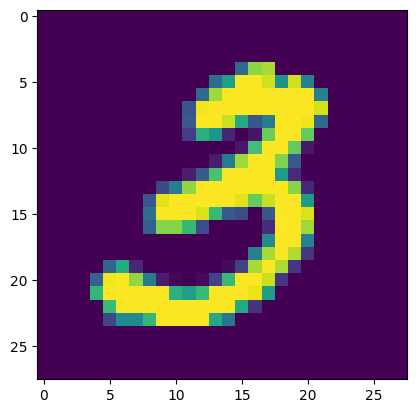

Predicted label:  6
Ground-truth label:  3


In [74]:
i = randint(0,len(x_test))
test = x_test[i]
pred = Hyper.predict(np.expand_dims(test, axis=0))[0]
plt.imshow(test)
plt.show()
print('Predicted label: ', np.argmax(pred))
print('Ground-truth label: ', np.argmax(y_test[i]))

313/313 [==============================] - 1s 2ms/step


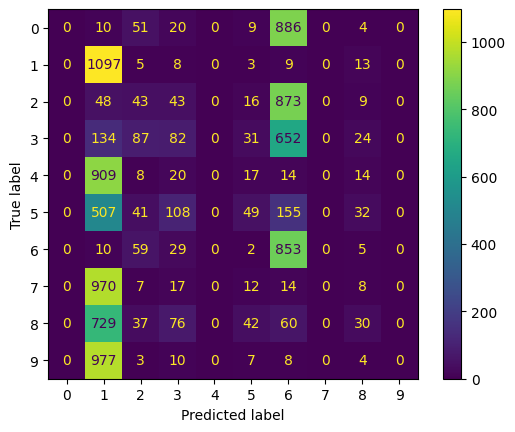

(0.2154, 0.10391694173058294)

In [75]:
y_pred_Hyper =Hyper.predict(x_test)
y_pred_Hyper = np.array([np.argmax(i) for i in y_pred_Hyper])
accu(np.array([np.argmax(i) for i in y_test]), y_pred_Hyper)